In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
rent_df = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")

In [3]:
rent_df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [4]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [5]:
rent_df['neighborhood'].value_counts()

Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Tribeca                119
Midtown                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Stuyvesant Town/PCV      3
Little Italy             3
West Harlem              2
Manhattanville           1
Name: neighborhood, dtype: int64

In [6]:
rent_df.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [3]:
rent_df.drop(['rental_id', 'borough'], axis=1, inplace=True)

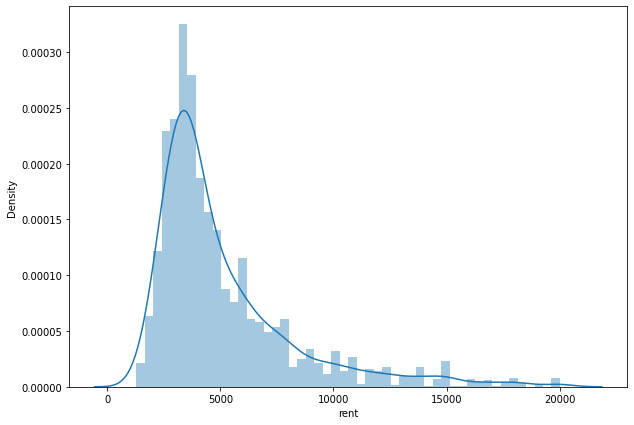

In [8]:
plt.figure(figsize=(10,7))
sns.distplot(rent_df['rent'])

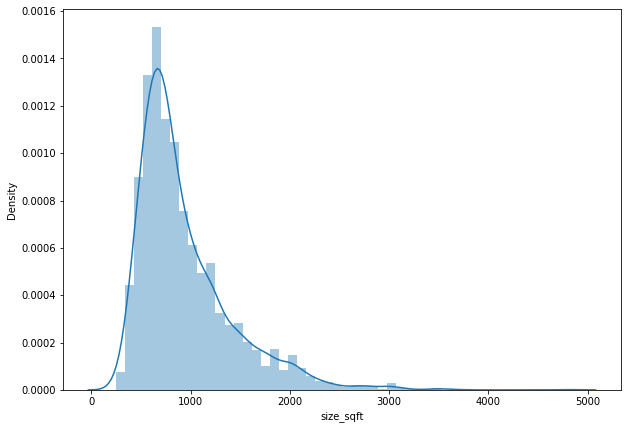

In [13]:
plt.figure(figsize=(10,7))
sns.distplot(rent_df['size_sqft'])

In [4]:
cat_cols = rent_df.select_dtypes(['object']).columns

In [5]:
cat_cols

Index(['neighborhood'], dtype='object')

In [6]:
for col in cat_cols:
  dummy = pd.get_dummies(rent_df[col], drop_first=True)
  rent_df = pd.concat([rent_df, dummy], axis=1)
  del rent_df[col]
  print(col)

del dummy

neighborhood


In [7]:
rent_df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,Nolita,Roosevelt Island,Soho,Stuyvesant Town/PCV,Tribeca,Upper East Side,Upper West Side,Washington Heights,West Harlem,West Village
0,2550,0.0,1,480,9,2.0,17,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,11500,2.0,2,2000,4,1.0,96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17500,2.0,2,4800,3,4.0,136,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
X = rent_df.drop('rent',axis=1)
y = rent_df['rent']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## **RF Model**

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
params = {
        "n_estimators":[100,200,500,1000],
        "max_depth":[None,5,10,20]
}

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor()

In [38]:
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=10, scoring='neg_root_mean_squared_error',
                                   cv=5, refit=True, return_train_score=True, n_jobs=4, random_state=42, verbose=1)

In [39]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [27]:
preds = random_search.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
np.sqrt(mean_squared_error(y_test, preds))

1322.4787225877171

## **XGB Model**

In [40]:
from xgboost.sklearn import XGBRegressor

In [77]:
xgb = XGBRegressor(learning_rate=0.1,n_estimators=1000,objective='reg:linear', random_state=42)

In [78]:
xgb.fit(X_train, y_train)

[06:57:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [79]:
pred = xgb.predict(X_test)

In [80]:
np.sqrt(mean_squared_error(y_test, pred))

1225.796785708613

In [81]:
xgb.score(X_test, y_test)

0.840696662355248

***SAVING MODEL***

In [82]:
xgb.save_model('Rent_model.bin')

In [ ]:
#Testing with new user data

In [ ]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]] #Lives in Upper East Side Neighborhood

In [12]:
from xgboost.sklearn import XGBRegressor

In [14]:
model = XGBRegressor()
model.load_model("Rent_model.bin")

[14:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [15]:
pred = model.predict(X_test)

In [16]:
pred

array([ 4657.1455,  4199.5425,  3998.785 ,  4470.8374,  3595.1223,
        3080.2834,  6911.176 ,  5571.204 ,  3594.4722,  7041.6216,
        3590.8796,  5067.4785,  3117.2778,  3656.5164,  4844.873 ,
        5277.319 ,  4952.042 ,  2567.0042,  4336.7803,  3293.8755,
        3459.414 , 11354.325 ,  5370.863 ,  4700.1523,  2763.3108,
        4658.0864,  7098.8687,  4804.369 ,  9803.23  , 13040.23  ,
        2729.377 ,  4470.6416,  4424.9233,  7639.37  , 12848.009 ,
        4435.475 ,  2605.8892,  3853.492 ,  2851.3792, 10191.505 ,
        3378.8203, 15300.822 ,  6881.814 ,  1955.6415,  3618.116 ,
        4931.2827,  6019.3374,  4782.529 ,  4833.6196,  4515.061 ,
       17460.023 , 10165.586 ,  2642.6646, 13440.091 ,  5381.9263,
        5045.241 ,  3419.0044,  4145.2783,  4768.436 ,  3233.7905,
        4616.279 ,  4087.6482,  3224.6675,  5392.1313,  8391.235 ,
        2184.7192,  8628.968 ,  5347.3525,  3225.3948,  4370.4097,
        3703.089 ,  3799.0938,  9842.364 ,  4900.1357,  4700.3

In [ ]:
X_